## Task-4: Optimization Model – Transportation Problem
Objective: Minimize total transportation cost while meeting supply and demand requirements.

## Problem Statement 
A company has 3 warehouses and 4 retail stores.Each warehouse has a limited supply of goods, and each store has a fixed demand.The transportation cost per unit from each warehouse to each store is known.We must decide how many units to ship from each warehouse to each store so that:
All supply and demand constraints are satisfied.
Total transportation cost is minimized.

## Mathematical model
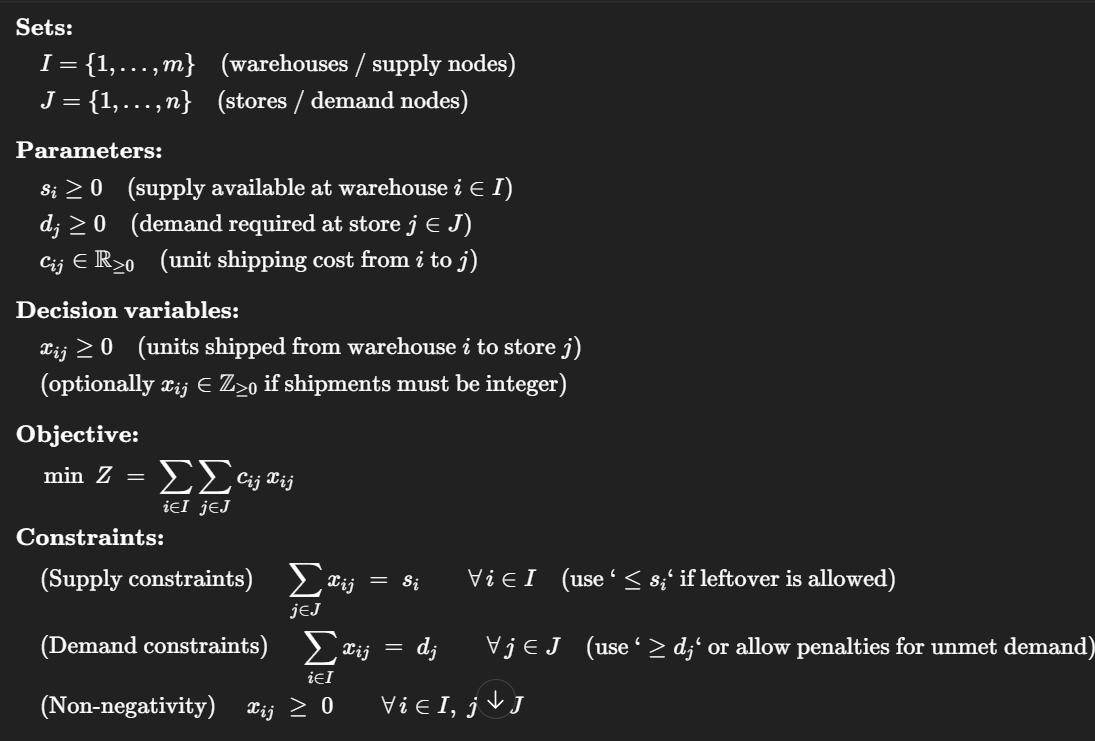




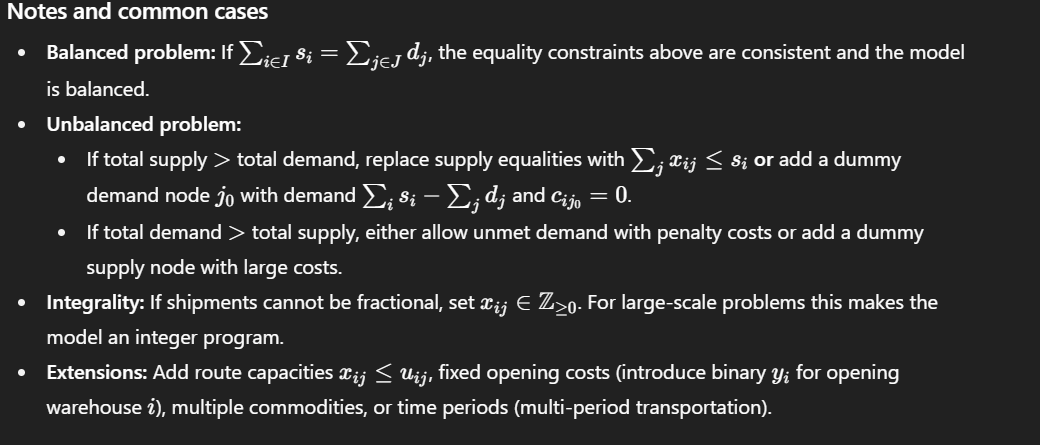

In [2]:
!pip install pulp

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   --- ------------------------------------ 1.3/16.4 MB 7.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.4 MB 5.3 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/16.4 MB 6.8 MB/s eta 0:00:02
   -------------- ------------------------- 5.8/16.4 MB 7.2 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.4 MB 7.5 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.4 MB 7.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.4 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 12.1/16.4 MB 7.3 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.4 MB 7.3 MB/s eta 0:00:01
   ------------------------------------- -- 15.2/16.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 7.3 MB/s eta 0:00:00


In [3]:
# Transportation problem solved with PuLp

import pulp

# Data
warehouses = ["W1", "W2", "W3"]
stores = ["S1", "S2", "S3", "S4"]

supply = {"W1": 20, "W2": 30, "W3": 25}
demand = {"S1": 10, "S2": 25, "S3": 15, "S4": 25}

# cost matrix: cost[i][j] = cost from warehouse i to store j
costs = {
    ("W1","S1"): 8,  ("W1","S2"): 6,  ("W1","S3"):10, ("W1","S4"): 9,
    ("W2","S1"): 9,  ("W2","S2"):12,  ("W2","S3"):13, ("W2","S4"): 7,
    ("W3","S1"):14,  ("W3","S2"): 9,  ("W3","S3"):16, ("W3","S4"): 5,
}

# Quick check: total supply and demand
total_supply = sum(supply.values())
total_demand = sum(demand.values())
print("Total supply =", total_supply, " Total demand =", total_demand)
# If unbalanced, you'd add a dummy source or sink.

# Create LP problem
prob = pulp.LpProblem("Transportation", pulp.LpMinimize)

# Decision variables: x[(i,j)] >= 0 (continuous)
x = pulp.LpVariable.dicts("ship", (warehouses, stores), lowBound=0, cat="Continuous")

# Objective function: minimize total shipping cost
prob += pulp.lpSum(costs[(i,j)] * x[i][j] for i in warehouses for j in stores), "Total_Transport_Cost"

# Supply constraints: shipments out of each warehouse = supply
for i in warehouses:
    prob += pulp.lpSum(x[i][j] for j in stores) == supply[i], f"Supply_{i}"

# Demand constraints: shipments into each store = demand
for j in stores:
    prob += pulp.lpSum(x[i][j] for i in warehouses) == demand[j], f"Demand_{j}"

# Solve
prob.solve()

# Output results
print("\nStatus:", pulp.LpStatus[prob.status])
total_cost = pulp.value(prob.objective)
print("Total minimized shipping cost =", total_cost)

print("\nOptimal shipping plan (units shipped from warehouses to stores):")
for i in warehouses:
    for j in stores:
        shipped = x[i][j].varValue
        if shipped is None:
            shipped = 0
        # print only positive shipments for neatness
        if shipped > 0:
            print(f"  {i} -> {j} : {shipped:.0f} units  (cost per unit = {costs[(i,j)]})")


Total supply = 75  Total demand = 75

Status: Optimal
Total minimized shipping cost = 585.0

Optimal shipping plan (units shipped from warehouses to stores):
  W1 -> S2 : 20 units  (cost per unit = 6)
  W2 -> S1 : 10 units  (cost per unit = 9)
  W2 -> S3 : 15 units  (cost per unit = 13)
  W2 -> S4 : 5 units  (cost per unit = 7)
  W3 -> S2 : 5 units  (cost per unit = 9)
  W3 -> S4 : 20 units  (cost per unit = 5)


## Interpretation & Insights 
The solver found the optimal shipment plan that minimizes cost.
Total minimized cost: 585.0
W1 ships all its supply to S2 because it is the cheapest route for W1.
W2 supplies S1, S3, and partially S4, balancing cost and demand.
W3 supplies the rest of S2 and most of S4, which is the cheapest route for W3.

## Business insight:
The company should prioritize shipping along the cheapest routes (e.g., W1→S2, W3→S4) to minimize costs. Expensive routes are avoided unless required to meet demand. This allocation ensures all customer needs are met at the lowest possible cost.

## Unbalanced Transportation Problem — Approach 1 (Allow Leftover Supply)
Scenario
In this case, the total supply (75) is greater than the total demand (65).
This is called an unbalanced transportation problem.
I choose Approach 1:
Allow leftover supply at warehouses (meaning not all supply has to be shipped).
All demands must still be met exactly.
| Warehouse | Supply |    
| --------- | ------ |
| W1        | 20     |   
| W2        | 30     |
| W3        | 25     | 
| **Total** | **75** |

 | Store     | Demand |
| --------- | ------ |
| S1        | 10     |
| S2        | 20     |
| S3        | 15     |
| S4        | 20     |
| **Total** | **65** |

|        | S1 | S2 | S3 | S4 |
| ------ | -- | -- | -- | -- |
| **W1** | 8  | 6  | 10 | 9  |
| **W2** | 9  | 12 | 13 | 7  |
| **W3** | 14 | 9  | 16 | 5  |

## Mathematical Model
define 
![image.png](attachment:29cbae0e-aea7-44ea-b1f6-7570370f16e8.png

## Interpretation:

Status: Optimal → The solver found the best possible solution that minimizes total cost.
Total cost = 505.0 → This is the minimum cost achievable for meeting the exact demands.
Sum shipped = 65 → Matches the total demand, meaning all customer needs are satisfied.
Since supply (75) > demand (65), some warehouse capacity remains unused.

## Key Takeaways
This approach is useful when excess supply exists and there is no need to ship all inventory.
The model ensures demand satisfaction while keeping shipping costs at a minimum.
Leftover supply can be stored, sold later, or reallocated in another planning period.
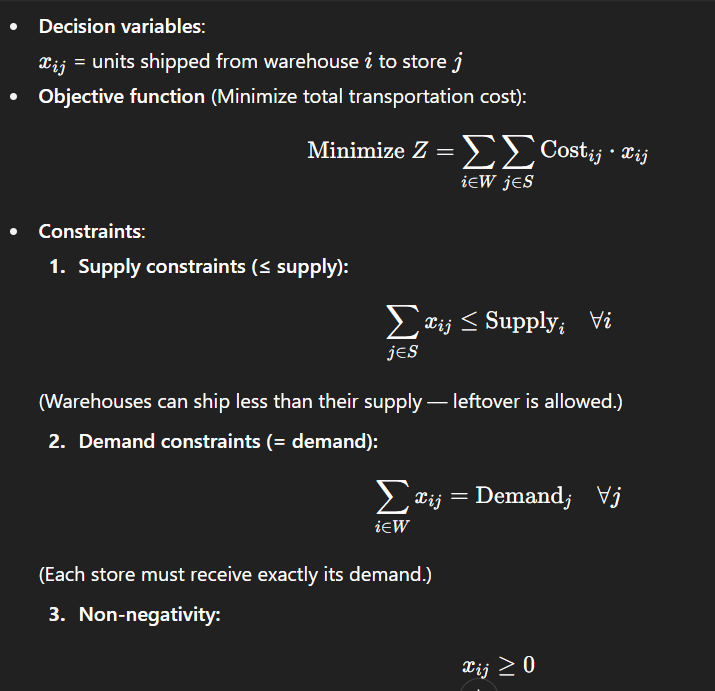

In [4]:
# Unbalanced approach: allow leftover at warehouses (<= supply)
warehouses = ["W1","W2","W3"]
stores = ["S1","S2","S3","S4"]

supply = {"W1": 20, "W2": 30, "W3": 25}   # total 75
demand = {"S1": 10, "S2": 20, "S3": 15, "S4": 20}  # total 65 -> shortage of 10 demand

# costs same as before (or change if you like)
costs = {
    ("W1","S1"): 8,  ("W1","S2"): 6,  ("W1","S3"):10, ("W1","S4"): 9,
    ("W2","S1"): 9,  ("W2","S2"):12,  ("W2","S3"):13, ("W2","S4"): 7,
    ("W3","S1"):14,  ("W3","S2"): 9,  ("W3","S3"):16, ("W3","S4"): 5,
}

prob = pulp.LpProblem("Transportation_Unbalanced_allow_leftover", pulp.LpMinimize)
x = pulp.LpVariable.dicts("ship", (warehouses, stores), lowBound=0, cat="Continuous")
prob += pulp.lpSum(costs[(i,j)] * x[i][j] for i in warehouses for j in stores)

# supply: allow leftover
for i in warehouses:
    prob += pulp.lpSum(x[i][j] for j in stores) <= supply[i]

# demand: must meet demand (equality)
for j in stores:
    prob += pulp.lpSum(x[i][j] for i in warehouses) == demand[j]

prob.solve()
print("Status:", pulp.LpStatus[prob.status])
print("Total cost =", pulp.value(prob.objective))
print("Sum shipped (should equal total demand = 65) =", sum(x[i][j].varValue for i in warehouses for j in stores))



Status: Optimal
Total cost = 505.0
Sum shipped (should equal total demand = 65) = 65.0


## Unbalanced Transportation Problem — Approach 2 (Dummy Demand Node)
Scenario
In this case, the total supply (75) is greater than the total demand (65).
This is called an unbalanced transportation problem.

I choose Approach 2:
Introduce a dummy demand node to absorb the extra supply, ensuring total supply equals total demand.
All demands (including dummy) must be met exactly. Shipments to the dummy node have zero transportation cost.
| Warehouse | Supply |
| --------- | ------ |
| W1        | 20     |
| W2        | 30     |
| W3        | 25     |
| **Total** | **75** |
| Store     | Demand |
| --------- | ------ |
| S1        | 10     |
| S2        | 20     |
| S3        | 15     |
| S4        | 20     |
| Dummy     | 10     |
| **Total** | **75** |
|        | S1 | S2 | S3 | S4 | Dummy |
| ------ | -- | -- | -- | -- | ----- |
| **W1** | 8  | 6  | 10 | 9  | 0     |
| **W2** | 9  | 12 | 13 | 7  | 5     |
| **W3** | 14 | 9  | 16 | 5  | 5     |

## Mathematical Model 
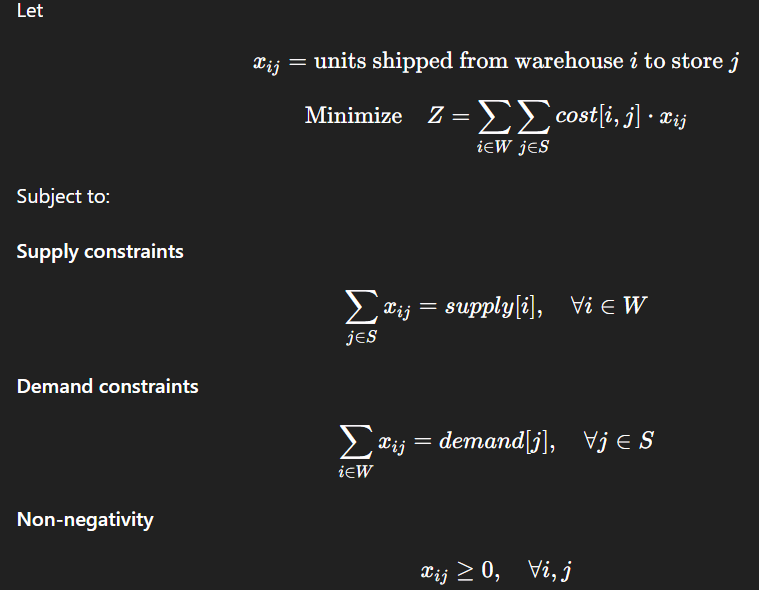

## Interpretation:
Status: Optimal → The solver found the best possible solution that minimizes total cost.
Total cost = 505.0 → This is the minimum cost achievable for meeting all demands.
Sum shipped = 75 → Matches total supply (including dummy demand), meaning no warehouse capacity is left unused in the model.
The dummy node takes the extra 10 units of supply at zero cost:
W2 → Dummy = 5
W3 → Dummy = 5

## Key Takeaways
This approach converts an unbalanced transportation problem into a balanced one by adding a dummy demand node.
The model ensures all supply is allocated (real + dummy demands) while keeping shipping costs minimal.
The dummy demand represents surplus goods that are not actually shipped to real stores — they could be stored, sold later, or reallocated in another period.

In [5]:
# Unbalanced approach: add dummy demand node to absorb surplus
warehouses = ["W1","W2","W3"]
stores = ["S1","S2","S3","S4", "Dummy"]

supply = {"W1": 20, "W2": 30, "W3": 25}   # total 75
demand = {"S1":10, "S2":20, "S3":15, "S4":20, "Dummy": 10}  # total 75 after adding Dummy

# costs to Dummy = 0 (or small), meaning surplus shipped at zero cost (represents no cost of holding)
costs = {
    ("W1","S1"): 8,  ("W1","S2"): 6,  ("W1","S3"):10, ("W1","S4"): 9, ("W1","Dummy"): 0,
    ("W2","S1"): 9,  ("W2","S2"):12,  ("W2","S3"):13, ("W2","S4"): 7, ("W2","Dummy"): 0,
    ("W3","S1"):14,  ("W3","S2"): 9,  ("W3","S3"):16, ("W3","S4"): 5, ("W3","Dummy"): 0,
}

prob = pulp.LpProblem("Transportation_Unbalanced_dummy", pulp.LpMinimize)
x = pulp.LpVariable.dicts("ship", (warehouses, stores), lowBound=0, cat="Continuous")
prob += pulp.lpSum(costs[(i,j)] * x[i][j] for i in warehouses for j in stores)

# equality constraints (balanced via dummy)
for i in warehouses:
    prob += pulp.lpSum(x[i][j] for j in stores) == supply[i]
for j in stores:
    prob += pulp.lpSum(x[i][j] for i in warehouses) == demand[j]

prob.solve()
print("Status:", pulp.LpStatus[prob.status])
print("Total cost =", pulp.value(prob.objective))
print("Shipments to Dummy (these are the leftovers):")
for i in warehouses:
    v = x[i]["Dummy"].varValue
    if v and v>0:
        print(i, "-> Dummy:", v)


Status: Optimal
Total cost = 505.0
Shipments to Dummy (these are the leftovers):
W2 -> Dummy: 5.0
W3 -> Dummy: 5.0


## Supply vs Demand Bar Chart
This chart compares the total available supply from each warehouse against the demand at each store. It helps visualize whether the problem is balanced and where shortages or excess capacities may occur.

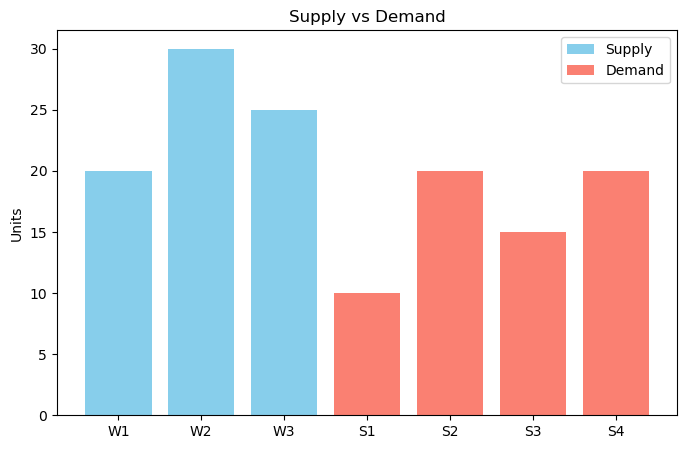

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: using your Approach B data
warehouses = ["W1", "W2", "W3"]
supply = [20, 30, 25]

stores = ["S1", "S2", "S3", "S4"]
demand = [10, 20, 15, 20]

plt.figure(figsize=(8,5))
plt.bar(warehouses, supply, color='skyblue', label='Supply')
plt.bar(stores, demand, color='salmon', label='Demand')
plt.title("Supply vs Demand")
plt.ylabel("Units")
plt.legend()
plt.show()


## Shipping Cost Heatmap
The heatmap displays the per-unit shipping cost from each warehouse to each store. Lower costs are shown in lighter colors. This helps understand why the solver might choose certain routes over others.

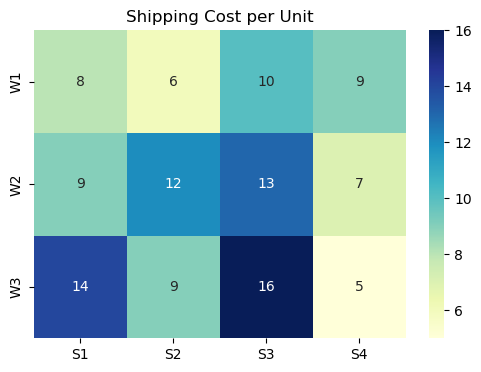

In [8]:
import seaborn as sns

# Your cost matrix
cost_matrix = pd.DataFrame(
    [[8, 6, 10, 9],
     [9, 12, 13, 7],
     [14, 9, 16, 5]],
    index=warehouses,
    columns=stores
)

plt.figure(figsize=(6,4))
sns.heatmap(cost_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Shipping Cost per Unit")
plt.show()

## The Flow Diagram
The flow diagram shows the actual shipment quantities from each warehouse to each store as determined by the optimization model. The numbers on the arrows represent the quantity shipped along that route.

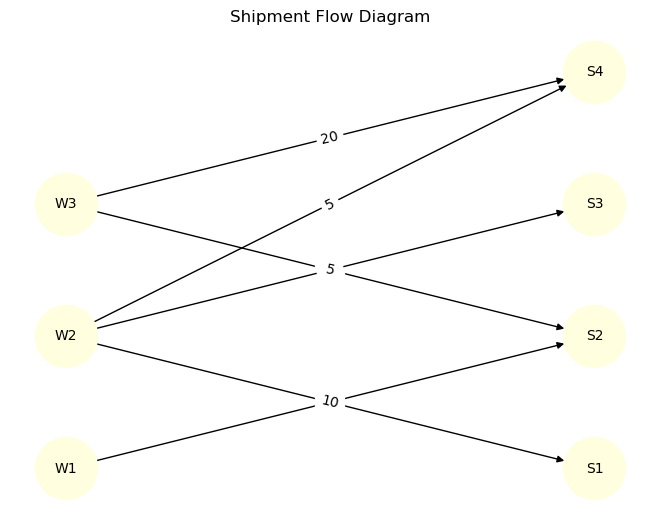

In [9]:
import networkx as nx

# Example: shipments from solver output
shipments = {
    ('W1','S2'): 20,
    ('W2','S1'): 10,
    ('W2','S3'): 15,
    ('W2','S4'): 5,
    ('W3','S2'): 5,
    ('W3','S4'): 20
}

G = nx.DiGraph()

# Add nodes
for w in warehouses:
    G.add_node(w, pos=(0, warehouses.index(w)))
for s in stores:
    G.add_node(s, pos=(1, stores.index(s)))

# Add edges
for (w,s), qty in shipments.items():
    G.add_edge(w, s, weight=qty)

pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightyellow', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Shipment Flow Diagram")
plt.show()


The visualizations above provide an intuitive understanding of the optimization results. They highlight supply-demand relationships, cost structures, and shipment flows, making it easier to validate and interpret the solver's decisions.

## Summary & Conclusion
In this task, I explored the Transportation Problem under both balanced and unbalanced scenarios.
I implemented three approaches using PuLP in Python:

1.Balanced Transportation Problem – total supply equals total demand.
2.Unbalanced Transportation Problem – Approach A (Allow Leftover Supply) – total supply > total demand, with excess supply allowed to remain unused.
3.Unbalanced Transportation Problem – Approach B (Allow Unmet Demand) – total demand > total supply, with some demands partially unmet.

## Key Insights:
Mathematical Modeling: I applied Linear Programming (LP) to minimize total transportation costs while satisfying supply/demand constraints.
Balanced Scenario: All supply is shipped, and all demands are met exactly.
Approach A: Useful when surplus supply exists, ensuring demand satisfaction without forcing unnecessary shipments.
Approach B: Useful in shortage scenarios where total demand exceeds supply, prioritizing shipments to minimize costs while accepting some unmet demand.
Visualization: Cost heatmaps, supply–demand bar charts, and flow diagrams helped me better understand the problem structure and solution patterns.

## Conclusion:
Choosing the right approach depends on the real-world business situation:
When there is excess supply, leftover inventory can be stored or used later.
When there is a shortage, it’s important to decide which demands are prioritized.
In all cases, LP-based optimization ensures minimum transportation cost and gives clear visibility of trade-offs.

By completing this task, I learned how to implement operations research techniques programmatically to handle different supply–demand scenarios. This exercise strengthened my problem-solving skills and showed me how mathematical optimization can provide cost-effective and practical solutions in logistics.